In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")  # cleaner plots

In [29]:
#load dataset
df = pd.read_csv("house_price_train.csv")
df.head()

#explore dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
#check missing values
df.isnull().sum()

#fill missing values with mean
df.fillna(df.mean(numeric_only=True), inplace=True)

In [4]:
#EDA
#1. identify numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

#exclude irrelevant columns like 'Id'
numerical_cols = [col for col in numerical_cols if col != 'Id']

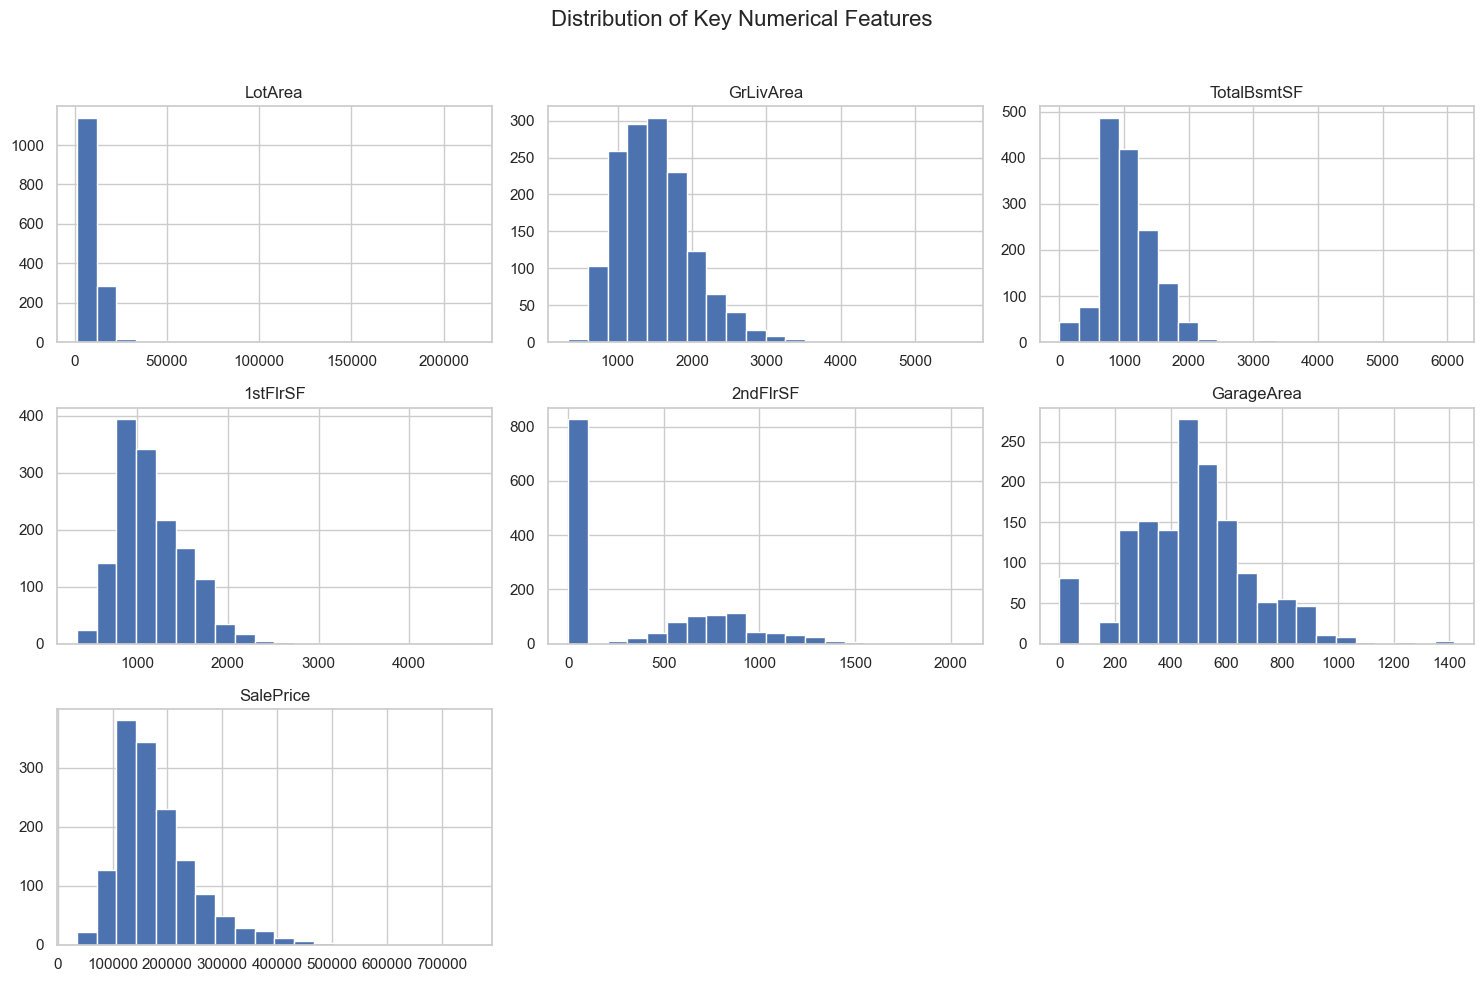

In [30]:
#2. Histograms of key numerical features
key_features = ['LotArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'SalePrice']
df[key_features].hist(bins=20, figsize=(15,10))
plt.suptitle("Distribution of Key Numerical Features", fontsize=16)
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

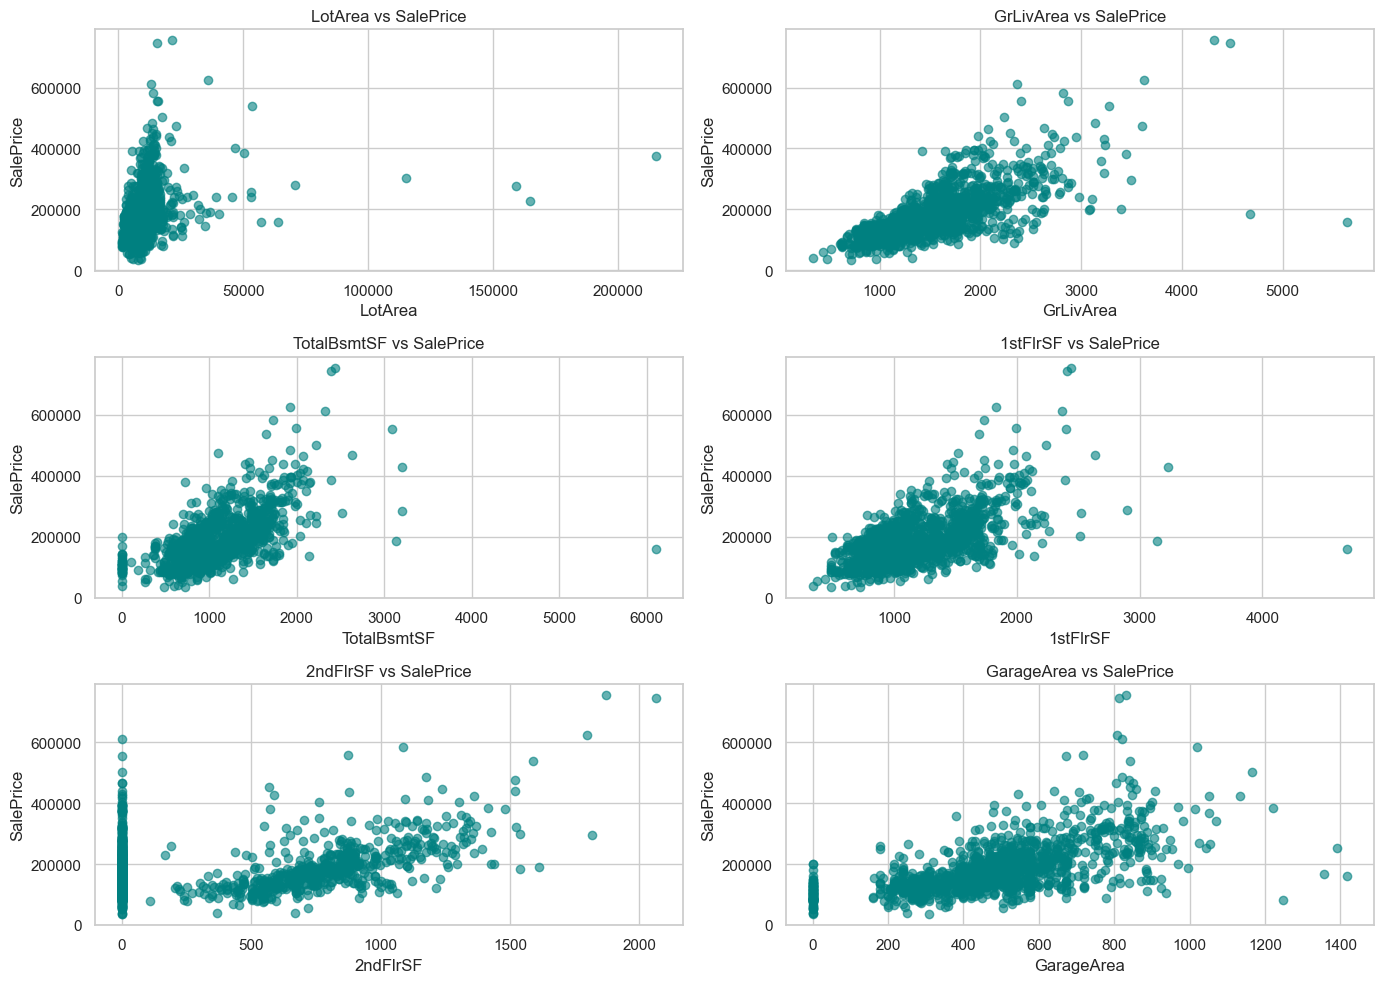

In [31]:
#3. Scatter plots of key features vs SalePrice
plt.figure(figsize=(14,10))
for i, feature in enumerate(key_features):
    if feature != 'SalePrice':
        plt.subplot(3,2,i+1)
        plt.scatter(df[feature], df['SalePrice'], alpha=0.6, color='teal')
        plt.xlabel(feature)
        plt.ylabel("SalePrice")
        plt.title(f"{feature} vs SalePrice")
plt.tight_layout()
plt.show()

In [7]:
#4. Correlation with SalePrice 
corr_with_target = df[key_features].corr()['SalePrice'].sort_values(ascending=False)
print("Correlation with SalePrice:\n", corr_with_target)

Correlation with SalePrice:
 SalePrice      1.000000
GrLivArea      0.708624
GarageArea     0.623431
TotalBsmtSF    0.613581
1stFlrSF       0.605852
2ndFlrSF       0.319334
LotArea        0.263843
Name: SalePrice, dtype: float64


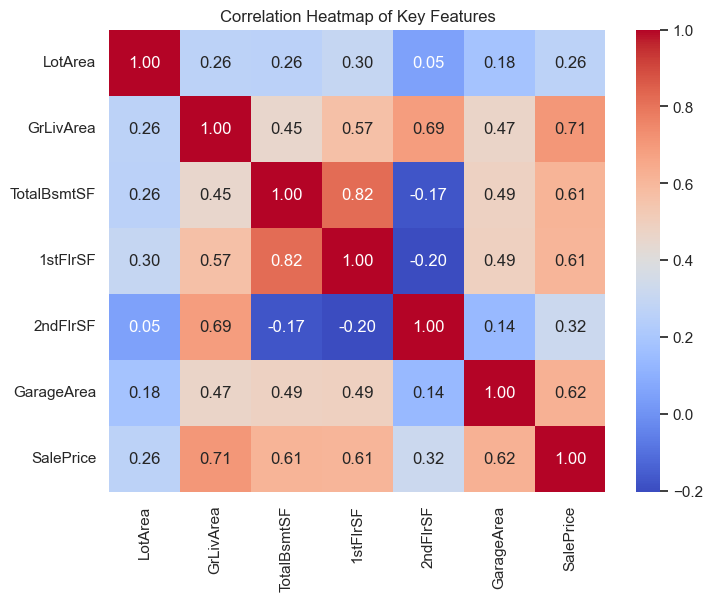

In [32]:
#5. Heatmap of key features
plt.figure(figsize=(8,6))
sns.heatmap(df[key_features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Key Features')
plt.show()

In [11]:
#prepare features and target
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

#handle categorical variables
X = pd.get_dummies(X, drop_first=True)

In [14]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
#train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 2429209831.4631534
R2 Score: 0.6832977156581719


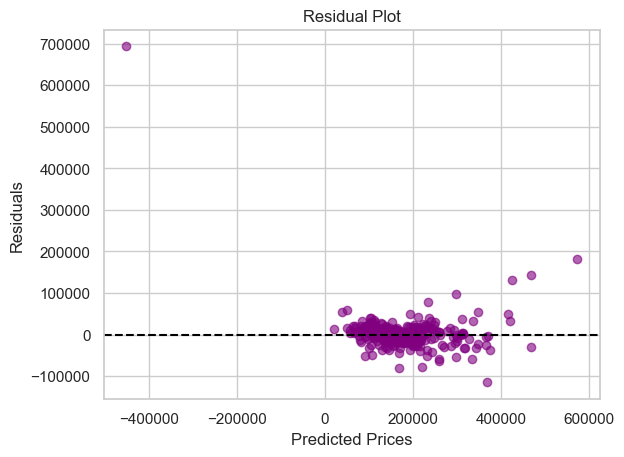

In [33]:
#predictions & evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

#residual plot
plt.scatter(y_pred, y_test - y_pred, alpha=0.6, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [20]:
#feature importance (coefficients)
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Feature Importance:\n", coeff_df)

Feature Importance:
               Feature    Coefficient
113    RoofMatl_Metal  658736.946632
117  RoofMatl_WdShngl  624358.802801
115  RoofMatl_Tar&Grv  617419.610973
114     RoofMatl_Roll  616256.482253
111  RoofMatl_CompShg  614627.543524
..                ...            ...
217     GarageQual_TA -159246.740813
215     GarageQual_Gd -160130.390997
214     GarageQual_Fa -164253.776648
216     GarageQual_Po -178285.133565
91    Condition2_PosN -232783.079166

[245 rows x 2 columns]


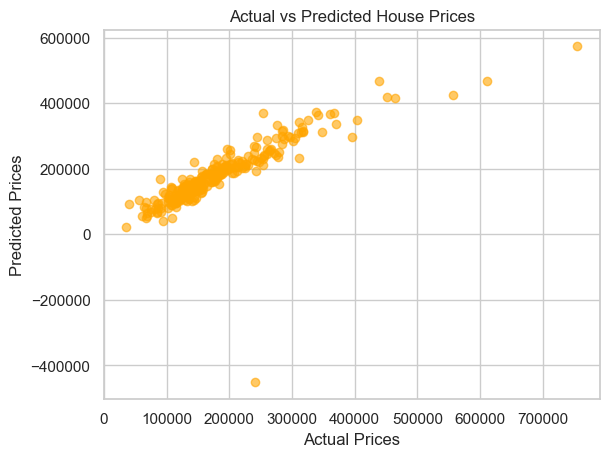

In [34]:
#visualization of Predictions
plt.scatter(y_test, y_pred, alpha=0.6, color='orange')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

## Interpretation of Results

- The model indicates that features such as **GrLivArea**, **TotalBsmtSF**, **1stFlrSF**, and **GarageArea**
  have the strongest influence on house prices.
- The model achieved an **R² score of 0.68**, indicating that it explains a reasonable portion of the
  variance in sale prices.
- This task demonstrates an understanding of **regression modeling**, **feature interpretation**, and
  the use of **evaluation metrics** to evaluate model performance.